In [231]:
# Import the libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.dummy import DummyClassifier
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.display import display

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [232]:
df = pd.read_excel("ECommerceDataset/E Commerce Dataset.xlsx","E Comm")

In [233]:
df = pd.read_excel("ECommerceDataset/E Commerce Dataset.xlsx","E Comm")
df = pd.DataFrame(df)
df = df.fillna(df.mean())
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [234]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.707922,1.000000,2.0,1.0,303.75
1,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.000000,1.751023,1.0,0.0,278.75
2,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.000000,2.000000,3.0,9.0,174.00
3,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.000000,1.000000,2.0,8.0,149.00
4,52848,0,31.0,Mobile Phone,1,16.0,Credit Card,Female,4.0,5,Mobile Phone,4,Divorced,6,1,21.000000,2.000000,2.0,1.0,158.46


In [235]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,52757,0,10.189899,Phone,2,8.0,UPI,Female,2.0,3,Mobile,4,Married,5,0,14.0,0.0,1.0,2.0,121.87
5626,52761,0,10.189899,Computer,1,7.0,CC,Male,2.0,4,Mobile,3,Married,2,0,12.0,0.0,1.0,0.0,120.08
5627,52774,0,10.189899,Phone,3,7.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,2.0,2.0,2.0,122.69
5628,52784,1,10.189899,Computer,3,15.0,E wallet,Male,2.0,3,Mobile Phone,5,Married,2,0,19.0,1.0,1.0,0.0,117.90
5629,52803,0,10.189899,Mobile Phone,1,8.0,CC,Female,3.0,3,Mobile,3,Married,3,0,14.0,0.0,1.0,2.0,120.01


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [237]:
# Show all of the columns
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [238]:
# Show the number of column and rows
df.shape

(5630, 20)

In [239]:
# The Numbers of "Churn" Size
df.groupby('Churn').size()

Churn
0    4682
1     948
dtype: int64

In [240]:
# Show some statistics
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.354164,0.915389,8.339095,0.705384,1.023999,1.380194,2.583586,0.451408,3.587926,1.851038,2.871521,3.553382,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.008004,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

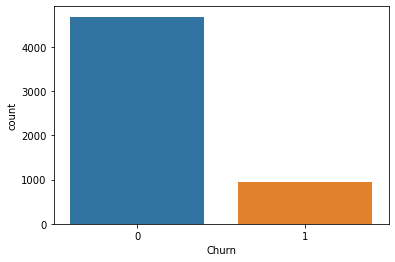

In [241]:
# Visualize the count of customer churn
sns.countplot(df['Churn'])

In [242]:
# What is the percentage of customers that are leaving?
num_retained = df[df.Churn == 0].shape[0]
num_churned = df[df.Churn== 1].shape[0]

# Print the percentage of customer that stayed
print(num_retained / (num_retained + num_churned) * 100, '% of customers stayed with the company.')

# Print the percentage of customer that left
print(num_churned / (num_retained + num_churned) * 100, '% of customers left with the company.')


83.16163410301954 % of customers stayed with the company.
16.838365896980463 % of customers left with the company.


<AxesSubplot:xlabel='Gender', ylabel='count'>

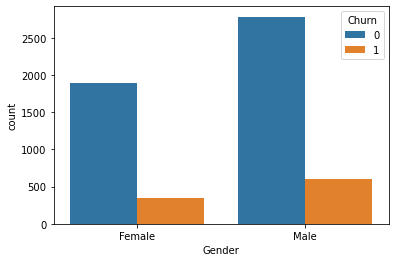

In [243]:
# Visualize the churn count for both males and females
sns.countplot(x='Gender', hue='Churn', data=df)

<AxesSubplot:xlabel='HourSpendOnApp', ylabel='count'>

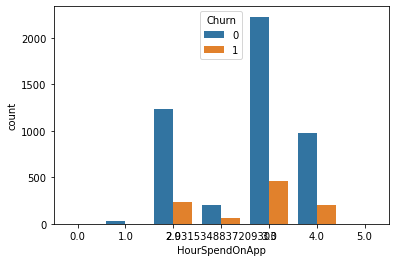

In [244]:
# Visualize the churn count for the HourSpendOnApp 
sns.countplot(x='HourSpendOnApp', hue='Churn', data = df)

array([<AxesSubplot:title={'center':'Tenure'}>,
       <AxesSubplot:title={'center':'Churn'}>], dtype=object)

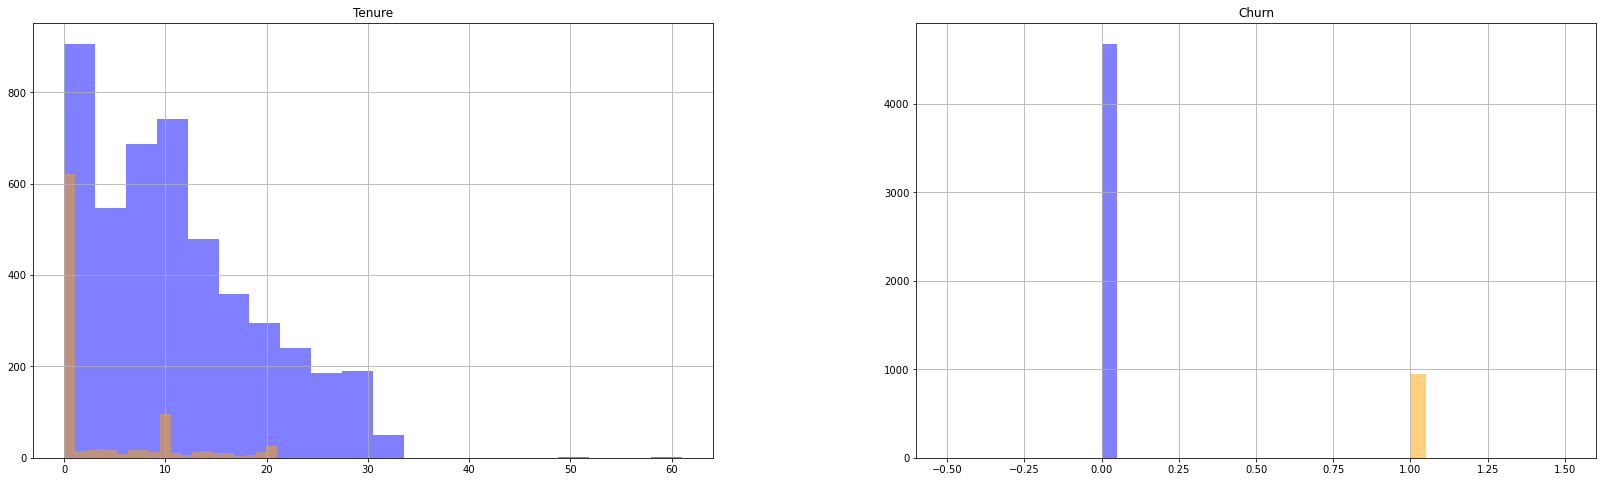

In [245]:
# Histogram of 'Tenure' and 'Churn'
numerical_features = ['Tenure', 'Churn']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax = ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax = ax)

In [246]:
# Remove unnecessary columns
col = ['CustomerID', 'NumberOfAddress']
clean_df = df.drop(col, axis = 1)

In [247]:
# Look at the number of rows and columns in the dataset
clean_df.shape

(5630, 18)

In [248]:
df['PreferredPaymentMode']

0        Debit Card
1        Debit Card
2        Debit Card
3        Debit Card
4       Credit Card
           ...     
5625            UPI
5626             CC
5627             CC
5628       E wallet
5629             CC
Name: PreferredPaymentMode, Length: 5630, dtype: object

In [329]:
clean_df['Gender'] = clean_df['Gender'].map({'Male': 1, 'Female': 0})
clean_df = pd.get_dummies(clean_df, drop_first=True)

In [250]:
clean_df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,61.0,3,28.0,0,4.0,4,1,1,15.707922,...,1,0,0,1,0,0,0,0,1,0
1,0,60.0,3,27.0,0,3.0,3,1,1,13.000000,...,1,0,0,1,0,0,0,0,1,0
2,0,51.0,1,7.0,1,4.0,2,3,0,25.000000,...,1,0,0,0,1,0,0,0,0,0
3,0,50.0,1,6.0,1,3.0,1,3,0,24.000000,...,1,0,0,0,1,0,0,0,0,0
4,0,31.0,1,16.0,0,4.0,5,4,1,21.000000,...,0,0,0,0,0,0,1,0,0,0


In [251]:
clean_df.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [364]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629
Tenure,61.000000,60.000000,51.0,50.0,31.00,31.000000,31.00,31.00,31.0,31.00,...,10.189899,10.189899,10.189899,10.189899,10.189899,10.189899,10.189899,10.189899,10.189899,10.189899
CityTier,3.000000,3.000000,1.0,1.0,1.00,1.000000,1.00,2.00,1.0,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000
WarehouseToHome,28.000000,27.000000,7.0,6.0,16.00,31.000000,10.00,13.00,7.0,7.00,...,13.000000,22.000000,8.000000,14.000000,22.000000,8.000000,7.000000,7.000000,15.000000,8.000000
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,4.000000,3.000000,4.0,3.0,4.00,3.000000,4.00,3.00,3.0,3.00,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000
NumberOfDeviceRegistered,4.000000,3.000000,2.0,1.0,5.00,3.000000,5.00,4.00,6.0,4.00,...,3.000000,5.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
SatisfactionScore,1.000000,1.000000,3.0,3.0,4.00,2.000000,2.00,3.00,3.0,3.00,...,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,5.000000,3.000000
Complain,1.000000,1.000000,0.0,0.0,1.00,1.000000,0.00,0.00,1.0,0.00,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OrderAmountHikeFromlastYear,15.707922,13.000000,25.0,24.0,21.00,17.000000,18.00,18.00,14.0,12.00,...,14.000000,23.000000,11.000000,16.000000,14.000000,14.000000,12.000000,14.000000,19.000000,14.000000
CouponUsed,1.000000,1.751023,2.0,1.0,2.00,2.000000,1.00,3.00,2.0,2.00,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000


In [330]:
clean_df.isna()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5626,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5627,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5628,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [254]:
# Show the new data set data types
clean_df.dtypes

Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
Gender                                     int64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredLoginDevice_Mobile Phone          uint8
PreferredLoginDevice_Phone                 uint8
PreferredPaymentMode_COD                   uint8
PreferredPaymentMode_Cash on Delivery      uint8
PreferredPaymentMode_Credit Card           uint8
PreferredPaymentMode_Debit Card            uint8
PreferredPaymentMode

In [255]:
# Show the first 5 rows of the new data set
clean_df.head()

,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,0,61.0,3,28.0,0,4.0,4,1,1,15.707922,...,1,0,0,1,0,0,0,0,1,0
1,0,60.0,3,27.0,0,3.0,3,1,1,13.000000,...,1,0,0,1,0,0,0,0,1,0
2,0,51.0,1,7.0,1,4.0,2,3,0,25.000000,...,1,0,0,0,1,0,0,0,0,0
3,0,50.0,1,6.0,1,3.0,1,3,0,24.000000,...,1,0,0,0,1,0,0,0,0,0
4,0,31.0,1,16.0,0,4.0,5,4,1,21.000000,...,0,0,0,0,0,0,1,0,0,0


In [361]:
# Splitting x, y (Step 1)
x = clean_df.drop('Churn', axis = 1) # Feature data set
y = clean_df['Churn']

In [362]:
#Split the data into 80% traning and 20% testing (Step 2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [258]:
# Scaled the data (Step 3)
scale = StandardScaler()

In [259]:
# Scale, Test data (Step 4)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [260]:
# Create the model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(x_train, y_train)

LogisticRegression()

In [261]:
# Create the prediction on the test data
predictions_lr = model_lr.predict(x_test)

# Print the predictions
print(predictions_lr)

[0 0 0 ... 1 0 0]


In [262]:
model_lr.score(x_train, y_train)

0.8794404973357016

In [263]:
model_lr.score(x_test, y_test)

0.8872113676731794

In [264]:
#Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

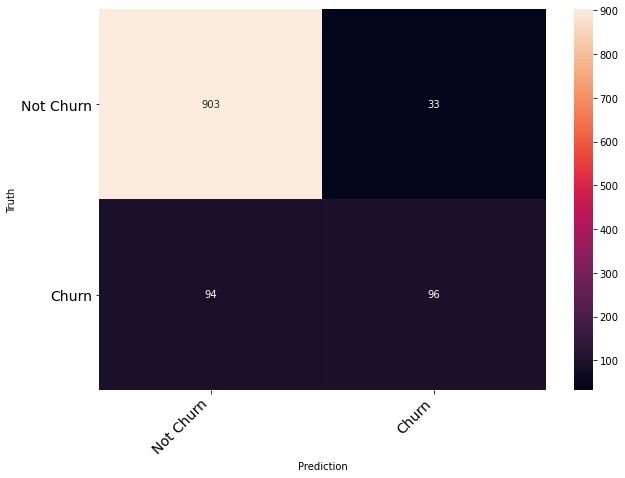

In [265]:
cm = confusion_matrix(y_test, predictions_lr)
print_confusion_matrix(cm, ['Not Churn', 'Churn'])

In [266]:
# Create the model
model_rf = RandomForestClassifier()

# Train the model
model_rf.fit(x_train, y_train)
# print(x_train)

RandomForestClassifier()

In [267]:
# Create the prediction on the test data
predictions_rf = model_rf.predict(x_test)

# Print the predictions
print(predictions_rf)

[0 0 0 ... 1 1 0]


In [268]:
model_rf.score(x_train, y_train)

1.0

In [269]:
model_rf.score(x_test, y_test)

0.9733570159857904

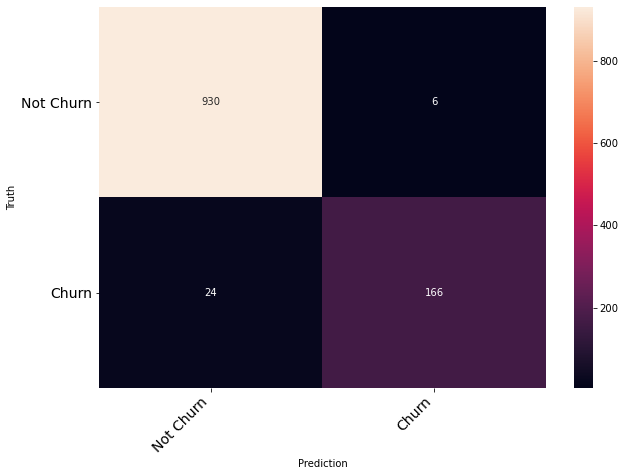

In [338]:
cm = confusion_matrix(y_test, predictions_rf)
print_confusion_matrix(cm, ['Not Churn', 'Churn'])

In [271]:
# Create the model
model_sv = SVC()

# Train the model
model_sv.fit(x_train, y_train)

SVC()

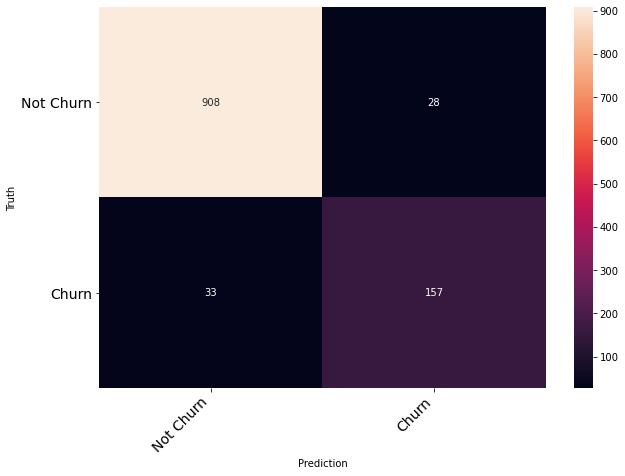

In [357]:
cm = confusion_matrix(y_test, predictions_dt)
print_confusion_matrix(cm, ['Not Churn', 'Churn'])

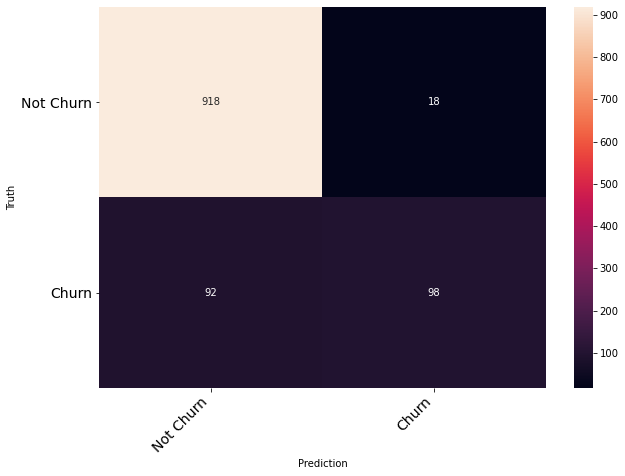

In [272]:
cm = confusion_matrix(y_test, predictions_sv)
print_confusion_matrix(cm, ['Not Churn', 'Churn'])

In [273]:
# Create the prediction on the test data
predictions_sv = model_sv.predict(x_test)

# Print the predictions
print(predictions_sv)

[0 0 0 ... 0 0 0]


In [274]:
model_sv.score(x_train, y_train)

0.9282859680284192

In [275]:
model_sv.score(x_test, y_test)

0.9023090586145648

In [276]:
# Create the model
model_dt = DecisionTreeClassifier()

#Train the model
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [277]:
# Create the prediction on the test data
predictions_dt = model_dt.predict(x_test)

# Print the predictions
print(predictions_dt)

[0 0 0 ... 1 1 0]


In [278]:
model_dt.score(x_train, y_train)

1.0

In [279]:
model_dt.score(x_test, y_test)

0.9458259325044405

In [280]:
# Create the model
model_gnb = GaussianNB()

# Train the model
model_gnb.fit(x_train, y_train)

GaussianNB()

In [281]:
# Create the prediction on the test data
predictions_gnb = model_gnb.predict(x_test)

# Print the predictions
print(predictions_gnb)

[0 0 1 ... 1 0 0]


In [282]:
model_gnb.score(x_train, y_train)

0.7457815275310835

In [283]:
model_gnb.score(x_test, y_test)

0.7477797513321492

In [284]:
# Create the model
model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [336]:
# Create the prediction on the test data
predictions_knn = model_knn.predict(x_test)

# Print the predictions
print(predictions_knn)

[0 0 0 ... 0 0 0]


In [287]:
model_knn.score(x_train, y_train)

0.9338365896980462

In [288]:
model_knn.score(x_test, y_test)

0.9014209591474245

In [290]:
# Model comparision
model_names = ['Logistic Regression', 
               'Random Forest', 
               'Decision Tree', 
               'Naive Bayes', 
               'K-NN', 
               'SVC']

classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True)
    ]

model_cols = []
compare_model=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(model_names, classifiers):
    clf.fit(x_train,y_train)
    compare_model.loc[index,'Classifiers'] = name
    compare_model.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    compare_model.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    compare_model.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    compare_model.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    compare_model.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    compare_model.loc[index, 'ROC-AUC'] = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
    index+=1

In [363]:
compare_model

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.879440,0.887211,0.744186,0.505263,0.601881,0.902244
1,Random Forest,1.000000,0.977798,0.966102,0.900000,0.931880,0.993801
2,Decision Tree,1.000000,0.946714,0.835052,0.852632,0.843750,0.909222
3,Naive Bayes,0.745782,0.747780,0.368715,0.694737,0.481752,0.818938
4,K-NN,0.933837,0.901421,0.801527,0.552632,0.654206,0.937140
5,SVC,0.928286,0.902309,0.844828,0.515789,0.640523,0.935504


In [292]:
compare_model.iloc[1:3]

,Classifiers,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC-AUC
1,Random Forest,1.0,0.977798,0.966102,0.900000,0.93188,0.993801
2,Decision Tree,1.0,0.946714,0.835052,0.852632,0.84375,0.909222


(0.0, 1.0)

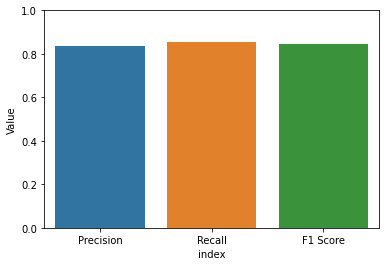

In [293]:
a = compare_model['Classifiers'] == 'Decision Tree'
b = compare_model[a]
c = b[['Precision', 'Recall', 'F1 Score']]

d = c.transpose()
dt1 = pd.DataFrame(d).rename(columns={2: 'Value'}).reset_index()
# fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='index', y='Value', data=dt1)
ax.set_ylim(0,1)

(0.0, 1.0)

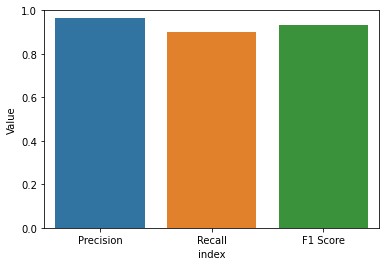

In [294]:
a = compare_model['Classifiers'] == 'Random Forest'
b = compare_model[a]
c = b[['Precision', 'Recall', 'F1 Score']]

d = c.transpose()
dt1 = pd.DataFrame(d).rename(columns={1: 'Value'}).reset_index()
# fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='index', y='Value', data=dt1)
ax.set_ylim(0,1)

In [295]:
# Probability Prediction
probs_lr = model_lr.predict_proba(x_test)

In [296]:
probs_rf = model_rf.predict_proba(x_test)

In [297]:
probs_dt = model_dt.predict_proba(x_test)

In [298]:
probs_lr[:,1]

array([0.1449901 , 0.01627133, 0.19003127, ..., 0.53575183, 0.48805752,
       0.01559148])

In [299]:
auc_lr = roc_auc_score(y_test, probs_lr[:,1])

In [300]:
auc_lr = roc_auc_score(y_test, probs_lr[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr[:,1])

In [301]:
auc_rf = roc_auc_score(y_test, probs_rf[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf[:,1])

In [302]:
auc_dt = roc_auc_score(y_test, probs_dt[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt[:,1])

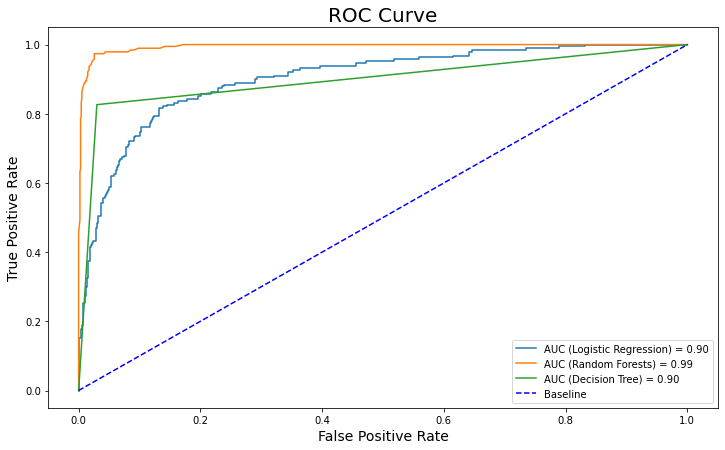

In [340]:
auc_lr = roc_auc_score(y_test, probs_lr[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr[:,1])

auc_rf = roc_auc_score(y_test, probs_rf[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf[:,1])

auc_dt = roc_auc_score(y_test, probs_dt[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt[:,1])

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [ ]:
# recall = TP / (TP + FN)
# precision = TP / (TP + FP)
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)
# Accuracy = TP+TN/TP+FP+FN+TN

In [ ]:
# Provide Explanations 
To compare with the 6 models - Random Forest performs better than the others.

In [342]:
# Building The Structure Pipeline

In [343]:
# x_train,x_test,y_train,y_test = train_test_split(df.target, test_size=0.2, random_state=0)
# Pipeline Creation
# 1. Data Preprocessing by using Standard Scaler
# 3. Classifier

In [344]:
pipeline_lr=Pipeline([('Scalar1',StandardScaler()),
                     ('lr_classifier', LogisticRegression(random_state=0))])
                    

In [345]:
pipeline_sv=Pipeline([('Scalar2', StandardScaler()),
                     ('sv_classifier', SVC())])

In [346]:
pipeline_rf=Pipeline([('Scalar3', StandardScaler()),
                     ('rf_classifier', RandomForestClassifier())])

In [347]:
pipeline_dt=Pipeline([('Scalar4', StandardScaler()),
                     ('dt_classifier', DecisionTreeClassifier())])

In [348]:
pipeline_knn=Pipeline([('Scalar5', StandardScaler()),
                      ('knn_classifier', KNeighborsClassifier())])

In [349]:
pipeline_knn=Pipeline([('Scalar5', StandardScaler()),
                      ('gnb_classifier', GaussianNB())])

In [350]:
# Making the list of Pipeline
pipelines = [pipeline_lr, pipeline_sv, pipeline_rf, pipeline_dt, pipeline_knn, pipeline_gnb]

In [351]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [352]:
# Dictionary of pipelines and classifier for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: SVC, 2: RandomForestClassifier, 3: DecisionTreeClassifier, 4: KNeighborsClassifier, 5: GaussianNB}

# Fit the pipelines
for pipe in pipelines:
    #print(pipe)
    pipe.fit(x_train, y_train)

In [353]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Scalar6', StandardScaler()), ('pca5', PCA(n_components=2)),
                ('gnb_classifier', GaussianNB())])

In [354]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(x_test, y_test)))

Logistic Regression Test Accuracy: 0.8872113676731794
<class 'sklearn.svm._classes.SVC'> Test Accuracy: 0.9023090586145648
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Test Accuracy: 0.9751332149200711
<class 'sklearn.tree._classes.DecisionTreeClassifier'> Test Accuracy: 0.9502664298401421
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> Test Accuracy: 0.9014209591474245
<class 'sklearn.naive_bayes.GaussianNB'> Test Accuracy: 0.8312611012433393


In [355]:
for i, model in enumerate(pipelines):
    if model.score(x_test, y_test)>best_accuracy:
        best_accuracy=model.score(x_test, y_test)
        best_pipeline=model
        best_classifier=1
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:<class 'sklearn.svm._classes.SVC'>


In [ ]:
END